<a href="https://colab.research.google.com/github/Pappas313/Computational-vision/blob/main/%CE%A5%CF%80%CE%BF%CE%BB%CE%BF%CE%B3%CE%B9%CF%83%CF%84%CE%B9%CE%BA%CE%AE_%CF%8C%CF%81%CE%B1%CF%83%CE%B7_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Άσκηση #2, Εκπαίδευση αρχιτεκτονικής ViT στο σύνολο δεδομένων ‘Fashion MNIST’:**

Φορτώστε το notebook ‘ViT_cifar_fashion_MNIST.ipynb’, το οποίο περιέχει την υλοποίηση
ενός οπτικού ταξινομητή ‘ViT’ στο σύνολο δεδομένων ‘CIFAR-10’4. Το σύνολο ‘CIFAR-10’
αποτελείται από 60,000 έγχρωμες εικόνες διαστάσεων 32x32 που ανήκουν σε 10
σημασιολογικές κατηγορίες (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck).

Ζητούμενα:

Α. Εκπαιδεύστε έναν ‘ViT’ ταξινομητή για το σύνολο δεδομένων ‘Fashion MNIST’5
τροποποιώντας κατάλληλα τον κώδικα (οι ρουτίνες που είναι απαραίτητες για τη
φόρτωση των δεδομένων του ‘Fashion MNIST’ παρέχονται σε μορφή σχολίων).
Χρησιμοποιήστε τις προκαθορισμένες παραμέτρους εκπαίδευσης του μοντέλου,
δηλαδή τις ίδιες με αυτές για το σύνολο δεδομένων ‘CIFAR-10’. Το σύνολο ‘Fashion
MNIST’ αποτελείται από 70,000 γκρι (grayscale) εικόνες διαστάσεων 28x28 που
ανήκουν σε 10 σημασιολογικές κατηγορίες σχετικές με το πεδίο της μόδας (T-shirt/top,
trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankle boot).

Β. Εκπαιδεύστε τον ταξινομητή ‘ViT’ με διαφορετικές τιμές για τις βασικές παραμέτρους
της διαδικασίας εκπαίδευσης (‘N_EPOCHS’: πλήθος εποχών εκπαίδευσης) και της
αρχιτεκτονικής του νευρωνικού δικτύου (‘num_layers’: πλήθος στρωμάτων,
‘num_heads’: πλήθος κεφαλών). Υπολογίστε και τυπώστε για κάθε διαφορετική
παραμετροποίηση τα αποτελέσματα της διαδικασίας εκπαίδευσης (καμπύλες των
τιμών ‘accuracy’ και ‘loss’).

Γ. Για την καλύτερη παραμετροποίηση εκπαίδευσης που έχει προκύψει στο ζητούμενο Β,
υπολογίστε και τυπώστε προβλέψεις ταξινόμησης για τυχαία επιλεγμένες εικόνες του
συνόλου δεδομένων ‘Fashion MNIST’.

Στον παρακάτω κώδικα κανουμε import τις βιβλιοθήκες

In [ ]:
# Import libraries

!mkdir utils
!curl https://raw.githubusercontent.com/jgenc/vit-research/main/utils/patchifying.py > ./utils/patchifying.py
!curl https://raw.githubusercontent.com/jgenc/vit-research/main/utils/train_loop.py > ./utils/train_loop.py
!curl https://raw.githubusercontent.com/jgenc/vit-research/main/utils/plotting.py > ./utils/plotting.py
!curl https://raw.githubusercontent.com/jgenc/vit-research/main/test.png> image.png
%pip install torchinfo

from utils.train_loop import train_loop
from utils.plotting import plot_results
from torchvision.models import VisionTransformer
from torchvision.datasets.cifar import CIFAR10, CIFAR100
from torchvision.datasets.mnist import FashionMNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Grayscale, Compose
import torch
from torchinfo import summary

from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot as plt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   337  100   337    0     0   1071      0 --:--:-- --:--:-- --:--:--  1073
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2825  100  2825    0     0   9684      0 --:--:-- --:--:-- --:--:--  9707
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2974  100  2974    0     0  11713      0 --:--:-- --:--:-- --:--:-- 11754
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   797  100   797    0     0   3013      0 --:--:-- --:--:-- --:--:--  3018


In [ ]:
# Import CIFAR-10 dataset

train_dataset = CIFAR10(root='./data', train=True, download=True, transform=ToTensor())
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

100%|██████████| 170498071/170498071 [00:04<00:00, 40832477.68it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Import FashionMNIST dataset

transforms = Compose([
    Grayscale(3),
    ToTensor(),
])

#train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transforms)    # Το καινούριο train set
#test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transforms)    # Το καινούριο test set

#train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)                          # Αυτά μένουν ίδια
#test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [ ]:
# Define ViT parameters

num_layers = 6
num_heads = 8
num_classes = 10
hidden_dim = 128
mlp_dim = 128
dropout = 0.1
patch_size = 4
image_size = train_dataset[0][0].shape[1]

N_EPOCHS = 10
LR = 5e-5

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#define ViT model

model = VisionTransformer(
    image_size=image_size,
    patch_size=patch_size,
    num_layers=num_layers,
    hidden_dim=hidden_dim,
    num_heads=num_heads,
    num_classes=num_classes,
    mlp_dim=mlp_dim,
    dropout=dropout,
).to(device)

In [ ]:
# Estimate ViT model size

input_size = (128, 3, 32, 32) # CIFAR-10
#input_size = (128, 3, 28, 28) # FashionMNIST

summary(model, input_size=input_size)

Layer (type:depth-idx)                        Output Shape              Param #
VisionTransformer                             [128, 10]                 128
├─Conv2d: 1-1                                 [128, 128, 8, 8]          6,272
├─Encoder: 1-2                                [128, 65, 128]            8,320
│    └─Dropout: 2-1                           [128, 65, 128]            --
│    └─Sequential: 2-2                        [128, 65, 128]            --
│    │    └─EncoderBlock: 3-1                 [128, 65, 128]            99,584
│    │    └─EncoderBlock: 3-2                 [128, 65, 128]            99,584
│    │    └─EncoderBlock: 3-3                 [128, 65, 128]            99,584
│    │    └─EncoderBlock: 3-4                 [128, 65, 128]            99,584
│    │    └─EncoderBlock: 3-5                 [128, 65, 128]            99,584
│    │    └─EncoderBlock: 3-6                 [128, 65, 128]            99,584
│    └─LayerNorm: 2-3                         [128, 65, 128]    

In [ ]:
# Train ViT model

metrics = train_loop(
    model,
    train_loader,
    test_loader,
    device,
    num_layers,
    num_heads,
    hidden_dim,
    mlp_dim,
    N_EPOCHS,
    LR,
    # writer=SummaryWriter('runs/vit_cifar10'),
)
train_loss_metric, train_accuracy_metric, test_loss_metric, test_accuracy_metric = metrics

Epoch 1 in training: 100%|██████████| 196/196 [11:31<00:00,  2.79s/it]
                                                                      

Epoch 1/10 
Train loss: 2.19, Train accuracy: 17.78%



Training:  10%|█         | 1/10 [12:22<1:51:24, 742.76s/it]

Test loss: 2.08
Test accuracy: 20.52%



Epoch 2 in training: 100%|██████████| 196/196 [11:26<00:00,  2.74s/it]
                                                                      

Epoch 2/10 
Train loss: 2.00, Train accuracy: 23.60%



Training:  20%|██        | 2/10 [24:38<1:38:27, 738.41s/it]

Test loss: 1.91
Test accuracy: 27.12%



Epoch 3 in training: 100%|██████████| 196/196 [11:22<00:00,  2.78s/it]
                                                                      

Epoch 3/10 
Train loss: 1.88, Train accuracy: 27.85%



Training:  30%|███       | 3/10 [36:52<1:25:57, 736.79s/it]

Test loss: 1.83
Test accuracy: 30.77%



Epoch 4 in training: 100%|██████████| 196/196 [11:19<00:00,  2.63s/it]
                                                                      

Epoch 4/10 
Train loss: 1.80, Train accuracy: 31.22%



Training:  40%|████      | 4/10 [49:03<1:13:26, 734.34s/it]

Test loss: 1.77
Test accuracy: 33.12%



Epoch 5 in training: 100%|██████████| 196/196 [11:16<00:00,  2.69s/it]
                                                                      

Epoch 5/10 
Train loss: 1.75, Train accuracy: 33.52%



Training:  50%|█████     | 5/10 [1:01:12<1:01:02, 732.49s/it]

Test loss: 1.72
Test accuracy: 35.38%



Epoch 6 in training: 100%|██████████| 196/196 [11:14<00:00,  2.69s/it]
                                                                      

Epoch 6/10 
Train loss: 1.70, Train accuracy: 35.26%



Training:  60%|██████    | 6/10 [1:13:18<48:40, 730.04s/it]  

Test loss: 1.68
Test accuracy: 36.49%



Epoch 7 in training: 100%|██████████| 196/196 [11:18<00:00,  2.62s/it]
                                                                      

Epoch 7/10 
Train loss: 1.68, Train accuracy: 36.65%



Training:  70%|███████   | 7/10 [1:25:29<36:31, 730.43s/it]

Test loss: 1.65
Test accuracy: 37.82%



Epoch 8 in training: 100%|██████████| 196/196 [10:57<00:00,  2.60s/it]
                                                                      

Epoch 8/10 
Train loss: 1.65, Train accuracy: 37.93%



Training:  80%|████████  | 8/10 [1:37:14<24:04, 722.44s/it]

Test loss: 1.62
Test accuracy: 38.92%



Epoch 9 in training: 100%|██████████| 196/196 [10:39<00:00,  2.57s/it]
                                                                      

Epoch 9/10 
Train loss: 1.62, Train accuracy: 39.17%



Training:  90%|█████████ | 9/10 [1:48:42<11:51, 711.65s/it]

Test loss: 1.62
Test accuracy: 39.52%



Epoch 10 in training: 100%|██████████| 196/196 [10:35<00:00,  2.57s/it]
                                                                       

Epoch 10/10 
Train loss: 1.59, Train accuracy: 39.84%



Training: 100%|██████████| 10/10 [2:00:05<00:00, 720.58s/it]

Test loss: 1.57
Test accuracy: 40.83%


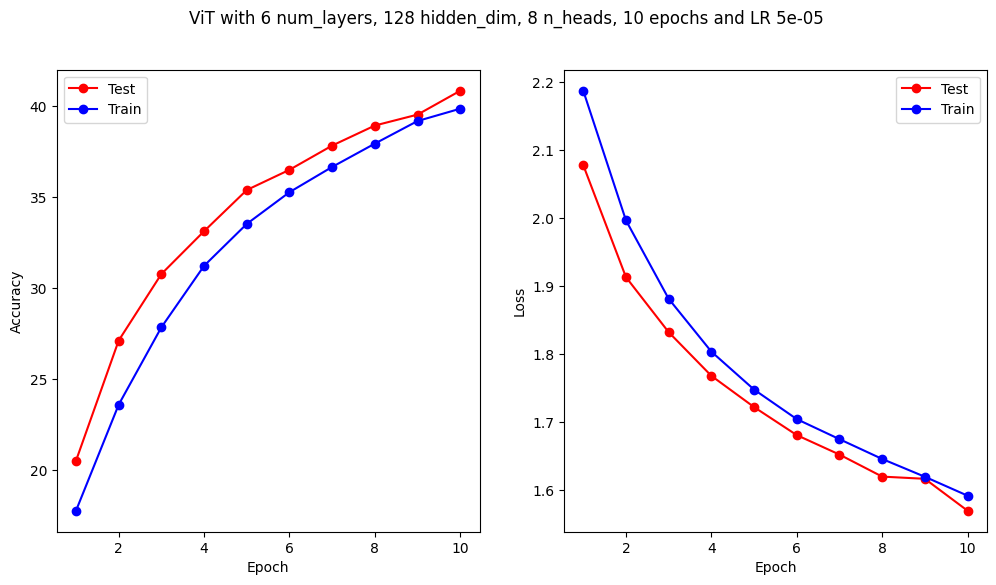

In [ ]:
# Plot training performance metrics

plot_results(
    num_layers,
    num_heads,
    hidden_dim,
    N_EPOCHS,
    LR,
    test_accuracy_metric,
    train_accuracy_metric,
    test_loss_metric,
    train_loss_metric,
)

Model predicted class 0. GT class is 4.
Probability vector: tensor([[ 2.6961, -1.6908,  1.4115, -0.5300,  0.4265, -0.8511, -1.0305, -1.7445,
          2.0677, -1.8456]], grad_fn=<AddmmBackward0>)


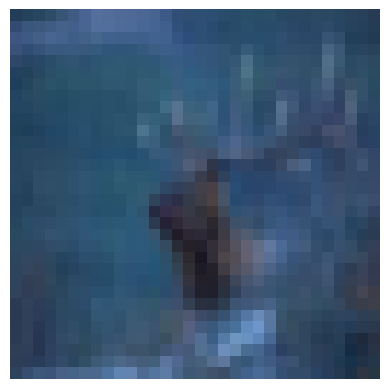

In [ ]:
# Estimate classification results for a given dataset image

index = 22 # Index of image in the dataset
image, label = test_dataset[index]

plt.axis("off")
plt.imshow(image.transpose(0, 2).transpose(0, 1))

prediction = model(image.unsqueeze(0).to(device))
print(f"Model predicted class {torch.argmax(prediction).item()}. GT class is {label}.")
print(f"Probability vector: {prediction}")